# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [3]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True

# Change quad bounds
meas.config_dict['meas_pv_info']['meas_device']['bounds'] = [-6, 8]

# Change settle time
meas.config_dict['meas_pv_info']['meas_device']['settle_time'] = 0.1

meas.config_dict


2023-08-28 15:58:14,381 | INFO : Initializing observer


{'beamline_info': {'name': 'LCLS2',
  'species': 'electron',
  'Lquad': 0.1244,
  'energy': 80000000.0,
  'Twiss0': [1e-06, 1e-06, 5.01, 5.01, 0.049, 0.049],
  'rMatx': [1, 2.2, 0, 1],
  'rMaty': [1, 2.2, 0, 1]},
 'img_proc': {'subtract_bg': False,
  'use_roi': False,
  'avg_ims': True,
  'n_to_acquire': 1,
  'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
  'amp_threshold': 150,
  'min_sigma': 3,
  'max_sigma': 700,
  'max_samples': 1,
  'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}},
 'meas_pv_info': {'diagnostic': {'pv': {'name': 'OTRS:HTR:330',
    'image': 'OTRS:HTR:330:Image:ArrayData',
    'nrow': 'OTRS:HTR:330:Image:ArraySize1_RBV',
    'ncol': 'OTRS:HTR:330:Image:ArraySize0_RBV',
    'resolution': 'OTRS:HTR:330:RESOLUTION',
    'xsize': 'OTRS:HTR:330:XRMS',
    'ysize': 'OTRS:HTR:330:YRMS'}},
  'meas_device': {'settle_time': 0.1,
   'bounds': [-6, 8],
   'pv': {'name': 'QUAD:HTR:120',
    'cntrl': 'QUAD:HTR:120:BCTRL',
   

In [4]:
meas.observer.get_beamsizes(1.2345)

(0.0002650537257897733, 0.0003632266641521922, 0, 0)

In [5]:
# Convenience methods.
meas.quad_init, meas.quad_bounds

([-6, -4, -2, 0], [-6, 8])

In [6]:
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'savepaths'])

In [7]:
meas.config_dict['meas_pv_info']['meas_device']

{'settle_time': 0.1,
 'bounds': [-6, 8],
 'pv': {'name': 'QUAD:HTR:120',
  'cntrl': 'QUAD:HTR:120:BCTRL',
  'read': 'QUAD:HTR:120:BACT'}}

In [8]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-08-28 15:58:14,561 | INFO : Initializing observer
2023-08-28 15:58:14,562 | INFO : Running online!
2023-08-28 15:58:14,562 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-08-28 15:58:14,563 | INFO : Settling for 0.1 s...
2023-08-28 15:58:14,902 | INFO : 2023-08-28_15-58-14-902019
2023-08-28 15:58:14,972 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-08-28 15:58:14,972 | INFO : Settling for 0.1 s...
2023-08-28 15:58:15,229 | INFO : 2023-08-28_15-58-15-229632
[<pyemittance.image.Image object at 0x12fd25910>, <pyemittance.image.Image object at 0x138394b50>]
2023-08-28 15:58:15,280 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-08-28 15:58:15,281 | INFO : Settling for 0.1 s...
2023-08-28 15:58:15,532 | INFO : 2023-08-28_15-58-15-532361
[<pyemittance.image.Image object at 0x12fd25910>, <pyemittance.image.Image object at 0x138394b50>, <pyemittance.image.Image object at 0x13f8740d0>]
2023-08-28 15:58:15,579 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-08-28 15:58:15,579 | INFO : Sett

/Users/chrisonian/Code/mambaforge/envs/devel/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


2023-08-28 15:58:17,667 | INFO : 2023-08-28_15-58-17-667353
2023-08-28 15:58:17,716 | INFO : EPICS put QUAD:HTR:120:BCTRL = 2.5
2023-08-28 15:58:17,717 | INFO : Settling for 0.1 s...
2023-08-28 15:58:18,002 | INFO : 2023-08-28_15-58-18-002921
2023-08-28 15:58:18,048 | INFO : Adapting ranges for y beam size measurement: [-1.8354391121594031, -1.1128659267995027, -0.39029274143960224, 0.3322804439202982, 1.0548536292801987, 1.777426814640099, 2.5]
2023-08-28 15:58:18,048 | INFO : EPICS put QUAD:HTR:120:BCTRL = -1.8354391121594031
2023-08-28 15:58:18,049 | INFO : Settling for 0.1 s...
2023-08-28 15:58:18,301 | INFO : 2023-08-28_15-58-18-300977
2023-08-28 15:58:18,348 | INFO : EPICS put QUAD:HTR:120:BCTRL = -1.1128659267995027
2023-08-28 15:58:18,349 | INFO : Settling for 0.1 s...
2023-08-28 15:58:18,599 | INFO : 2023-08-28_15-58-18-599691
2023-08-28 15:58:18,647 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.39029274143960224
2023-08-28 15:58:18,648 | INFO : Settling for 0.1 s...
2023-08-28 1

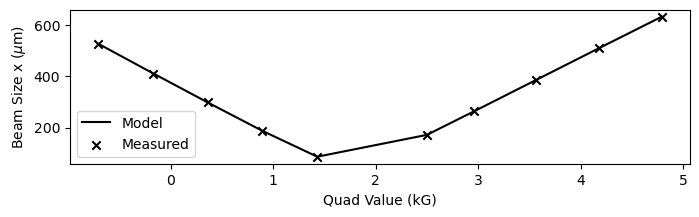

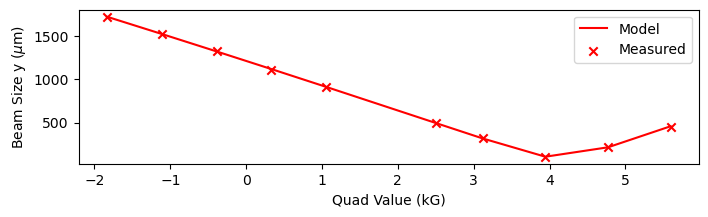

In [9]:
result = meas.measure_emittance()

# Examine results

In [10]:
import matplotlib.pyplot as plt

In [11]:
result

{'quadvalsx': array([-0.70919348, -0.1743279 ,  0.36053768,  0.89540326,  1.43026884,
         2.5       ,  2.95845621,  3.56973116,  4.18100611,  4.79228106]),
 'beamsizesx': array([5.25330721e-04, 4.11525010e-04, 2.99381691e-04, 1.86979707e-04,
        8.55474046e-05, 1.71305200e-04, 2.62825430e-04, 3.87391209e-04,
        5.10868423e-04, 6.32560699e-04]),
 'beamsizeserrx': array([5.64783322e-07, 4.39923155e-07, 3.00991669e-07, 9.79336467e-08,
        3.19334741e-08, 1.16698847e-07, 1.89999263e-07, 4.08546440e-07,
        5.77660473e-07, 8.56612664e-07]),
 'error_x': False,
 'emit_x': 6.4472703838354e-09,
 'norm_emit_x': 1.0093388815323108e-06,
 'beta_x': 9.912067150959421,
 'alpha_x': -1.9838491712479762,
 'emit_x_err': 1.0143951569344547e-11,
 'norm_emit_x_err': 1.5880650448584552e-09,
 'beta_x_rel_err': 0.0015733715146765783,
 'alpha_x_rel_err': -4.564129208643282e-20,
 'sigma_11': 6.390577698496841e-08,
 'sigma_12': 1.279041200778348e-08,
 'sigma_22': 3.2103816651723056e-09,
 'sc

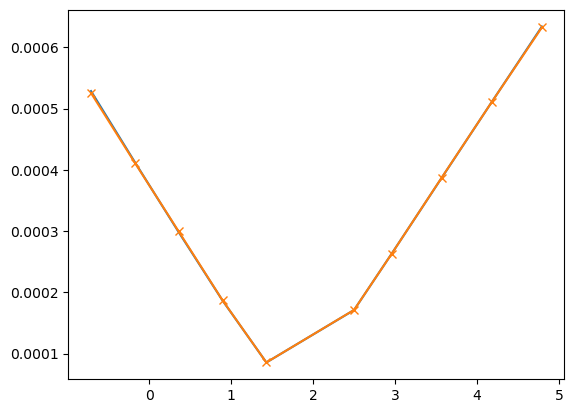

In [12]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

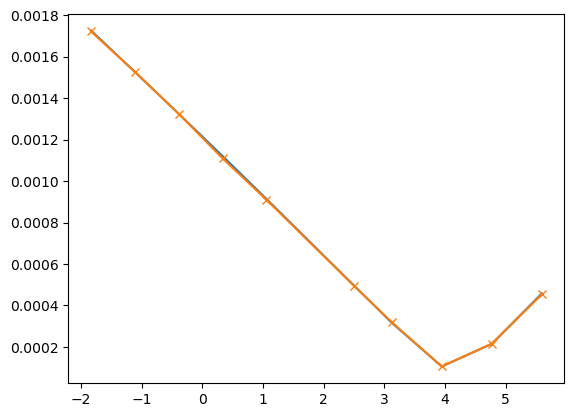

In [13]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Observer

The observer keeps all measurements made, as well as extra information such as images.

In [14]:
o = meas.observer
o.beam_meas['x']

[0.0017191572472911871,
 0.0012727615119388018,
 0.0008175309609975317,
 0.0007785581802629072,
 0.0006137758394920671,
 0.0005253307210244847,
 0.0004581353984105681,
 0.00041152500993657954,
 0.0003760715287499495,
 0.00029938169133850764,
 0.00018697970717780756,
 0.00015410854046542873,
 8.554740459104467e-05,
 nan,
 7.465789974449743e-05,
 0.00017130520034181403,
 0.00026282543011045393,
 0.00029464149413036347,
 0.00038739120901681303,
 0.00046087939249179186,
 0.0005108684228553866,
 0.0006325606993101487,
 0.0007963890454126519]

In [15]:
# Note that this was a problematic image
ix_nan = np.where(np.isnan(o.beam_meas['x']))[0][0]
ix_nan

13

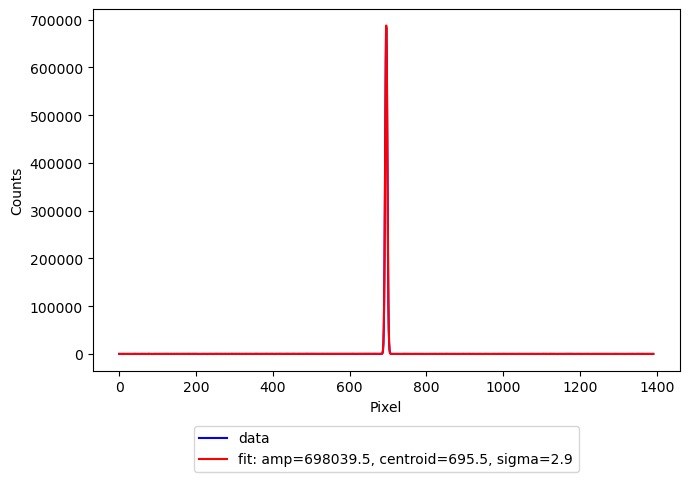

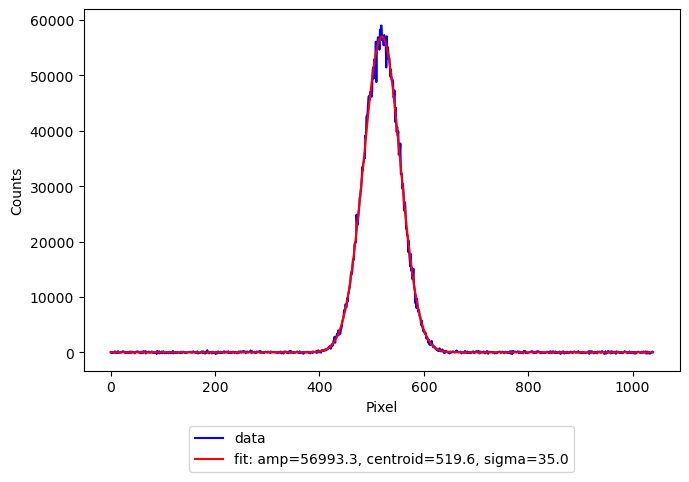

{'xrms': 2.860053227808453,
 'yrms': 35.04612662923173,
 'xrms_err': 0.0008987681803990822,
 'yrms_err': 0.05748695171477626,
 'xamp': 698039.4934741065,
 'yamp': 56993.260283667696}

In [16]:
# This is the image
o.extra[ix_nan].get_sizes()

In [17]:
# The observer can also set the quad and return sizes (and extra image).
dat = o.get_beamsizes(1.2345)
dat

2023-08-28 15:58:22,339 | INFO : EPICS put QUAD:HTR:120:BCTRL = 1.2345
2023-08-28 15:58:22,339 | INFO : Settling for 0.1 s...
2023-08-28 15:58:22,594 | INFO : 2023-08-28_15-58-22-594835


{'xrms': 0.00011958555562613127,
 'yrms': 0.0008521211832804216,
 'xrms_err': 6.234133694051143e-08,
 'yrms_err': 1.5130242275578473e-06,
 'extra': <pyemittance.image.Image at 0x17bd5de50>}

In [18]:
# This is the image
im = dat['extra']
im

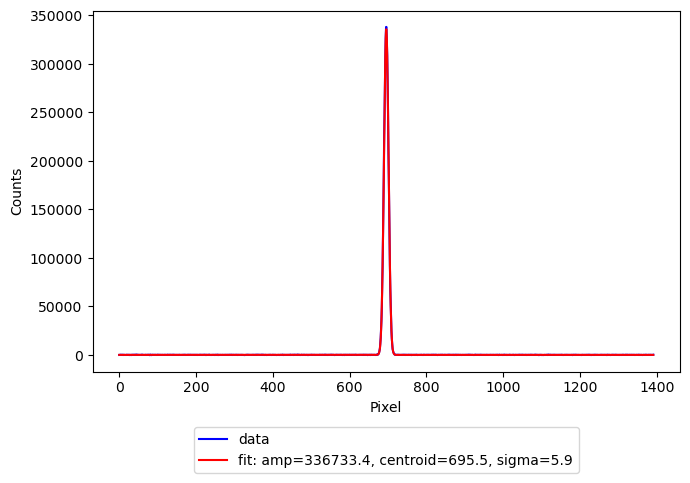

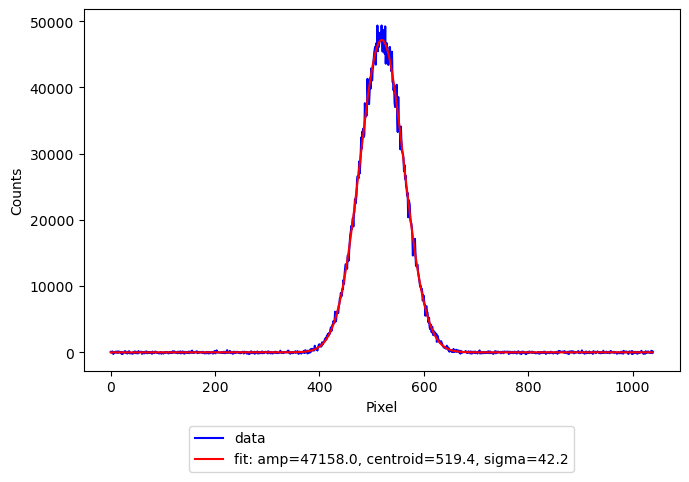

{'xrms': 5.920077011194618,
 'yrms': 42.18421699408028,
 'xrms_err': 0.003086204799035219,
 'yrms_err': 0.07490218948306175,
 'xamp': 336733.41980210366,
 'yamp': 47158.011826019385}

In [19]:
# This plots. TODO: make a .plot() instead
im.get_sizes()

# Interactively change the quad and acquire the screen image

0.00037486171231124573


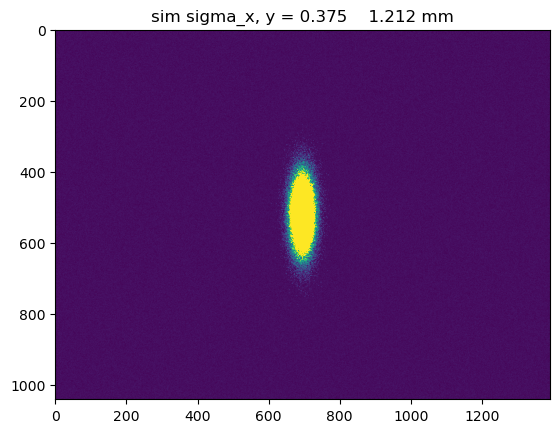

In [20]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)